In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("customer_data.csv")

In [3]:
df.head(10)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5
5,6,38,Male,7347,Bachelor,South,Silver,occasional,2822,Electronics,0,5
6,7,32,Female,8265,Bachelor,South,Silver,frequent,3293,Clothing,0,7
7,8,24,Female,47773,HighSchool,North,Regular,rare,21794,Books,0,5
8,9,27,Male,19154,College,East,Regular,occasional,5819,Clothing,0,5
9,10,28,Female,24666,HighSchool,North,Regular,rare,8779,Food,0,6


In [4]:
# Shape of data
df.shape

(100000, 12)

In [5]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [6]:
df.drop(['id'], axis=1, inplace=True)

In [7]:
# Missing values per column
df.isnull().sum()

age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [8]:
# Descriptive statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,30.00326,4.480535,12.0,27.00,30.0,33.00,49.0
income,100000.0,27516.26988,12996.782587,5000.0,16271.75,27584.5,38747.25,50000.0
purchase_amount,100000.0,9634.79084,4799.339449,1118.0,5583.00,9452.0,13350.00,26204.0
promotion_usage,100000.0,0.30080,0.458608,0.0,0.00,0.0,1.00,1.0
satisfaction_score,100000.0,5.00965,1.038714,0.0,4.00,5.0,6.00,10.0


In [9]:
# Summary for categorical features
df.describe(include=['object']).T

,count,unique,top,freq
gender,100000,2,Female,50074
education,100000,4,College,39874
region,100000,4,East,30074
loyalty_status,100000,3,Regular,60138
purchase_frequency,100000,3,rare,50019
product_category,100000,7,Electronics,30027


In [10]:
# Number of unique values
df.nunique()

age                      38
gender                    2
income                40003
education                 4
region                    4
loyalty_status            3
purchase_frequency        3
purchase_amount       18902
product_category          7
promotion_usage           2
satisfaction_score       11
dtype: int64

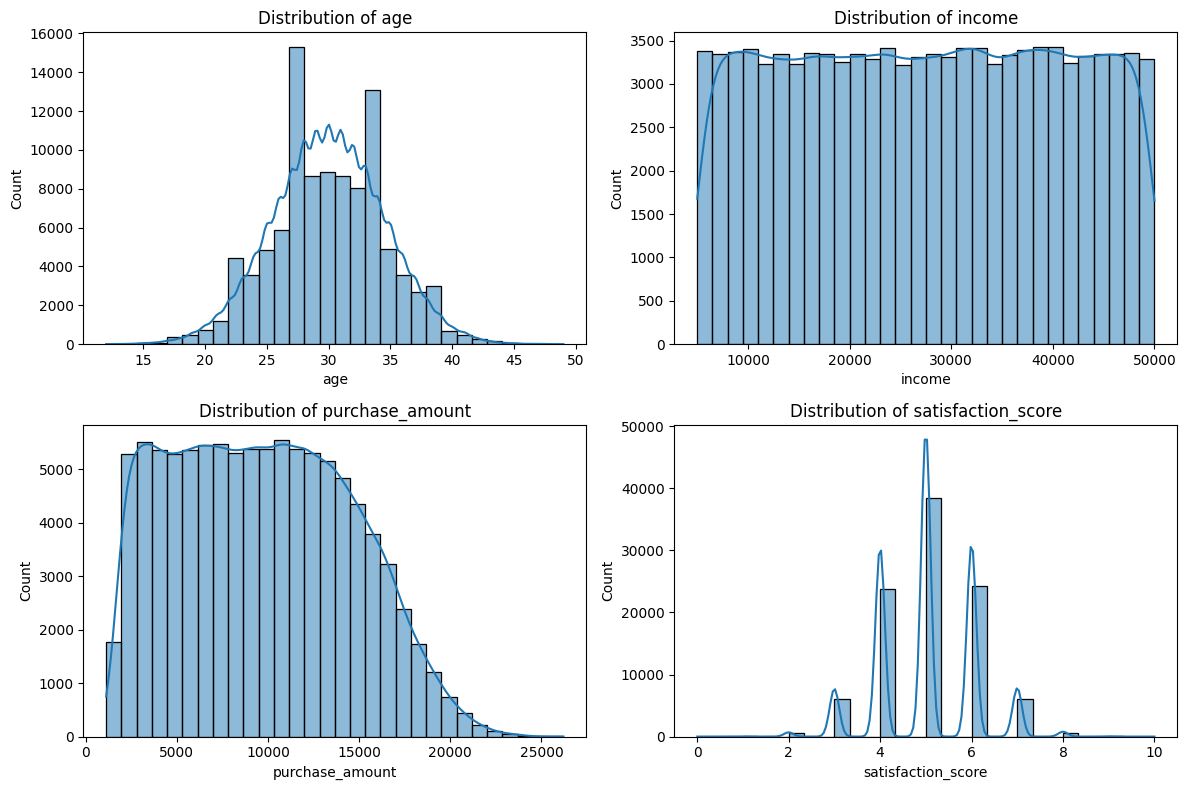

In [11]:
#Distribution of Key Scores
num_cols = ['age', 'income', 'purchase_amount', 'satisfaction_score']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


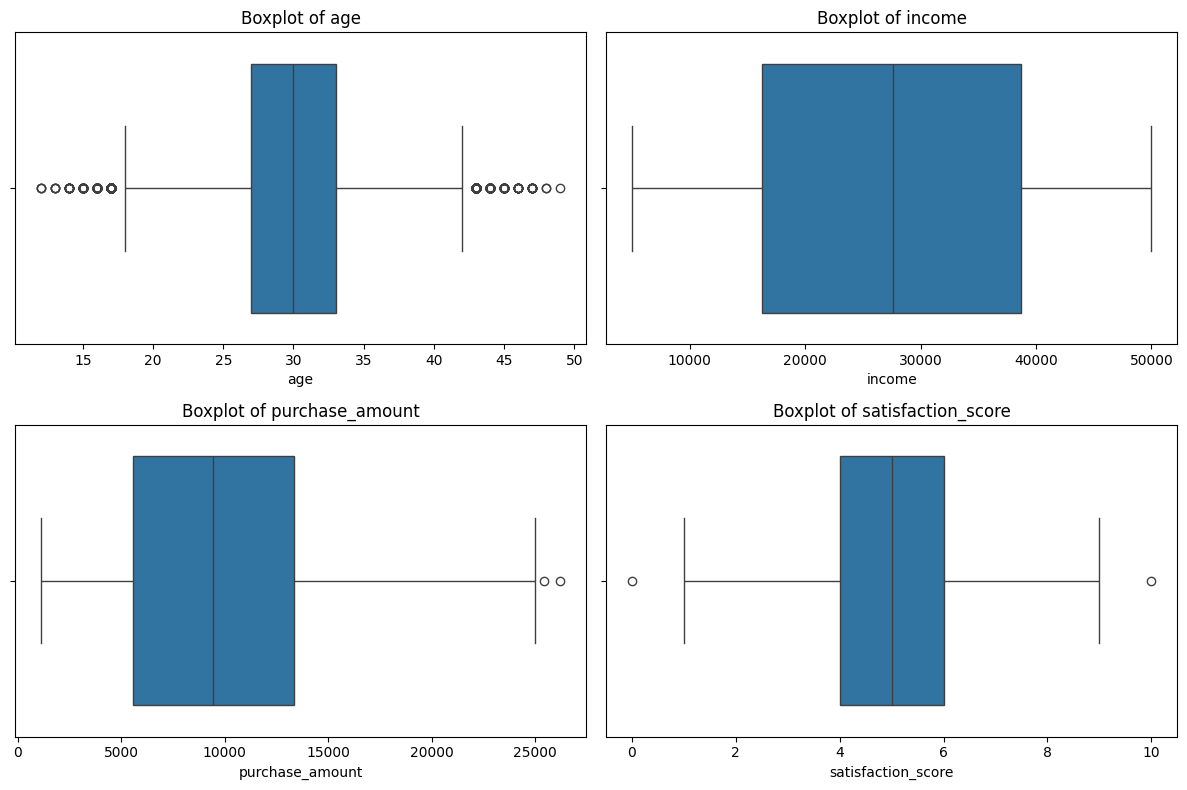

In [12]:
#Boxplots to Detect Outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [13]:
remove_outliers = True
if remove_outliers:
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99483.0,30.006081,4.379638,18.0,27.0,30.0,33.0,42.0
income,99483.0,27513.711378,12995.406160,5000.0,16271.0,27584.0,38743.0,50000.0
purchase_amount,99483.0,9633.967009,4798.451842,1118.0,5583.5,9452.0,13348.5,24967.0
promotion_usage,99483.0,0.300855,0.458632,0.0,0.0,0.0,1.0,1.0
satisfaction_score,99483.0,5.009791,1.038688,1.0,4.0,5.0,6.0,9.0


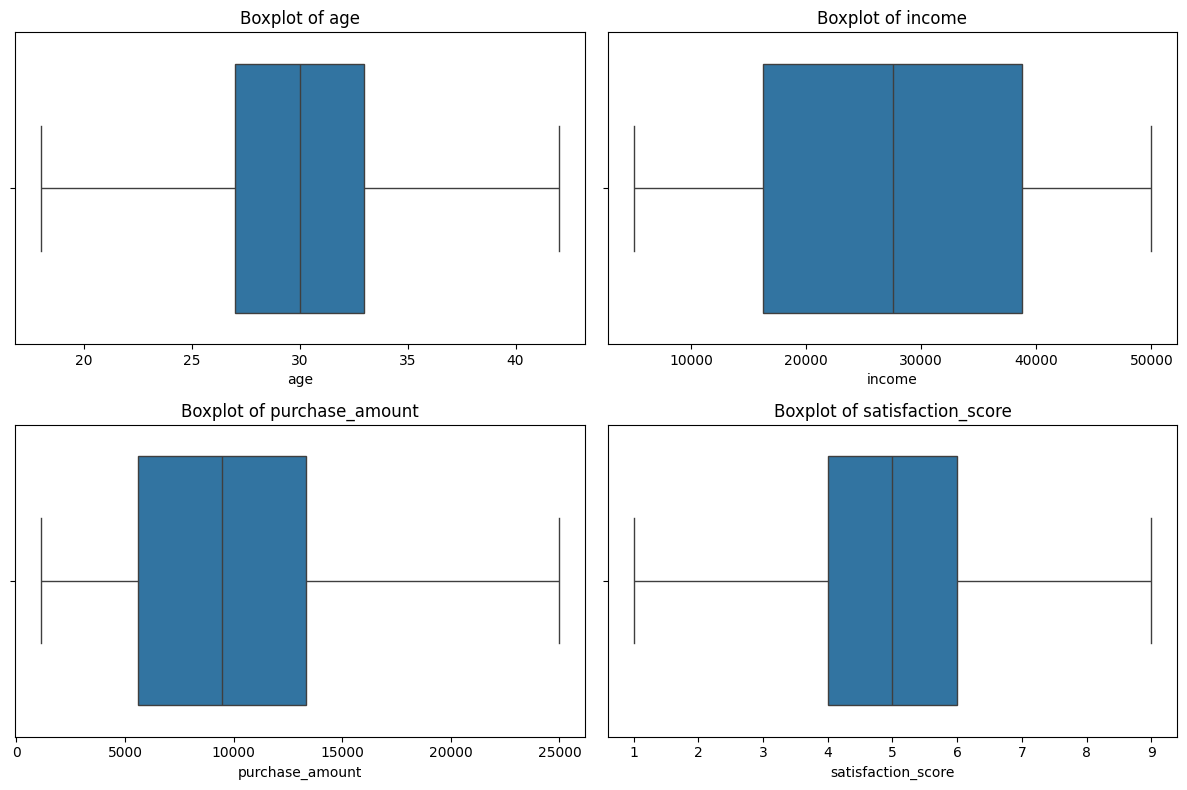

In [15]:
#Boxplots to Detect Outliers after removal
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [16]:
#Encode Categorical for Correlation
# Copy dataset for correlation
df_corr = df.copy()
# Encode categorical variables
for col in df_corr.select_dtypes(include=['object']).columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes

df_corr.head(20)


,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,1,40682,0,0,0,0,18249,1,0,6
1,29,1,15317,3,3,1,2,4557,2,1,6
2,37,1,38849,0,3,2,2,11822,2,0,6
3,30,1,11568,2,2,1,0,4098,4,0,7
4,31,0,46952,1,1,1,1,19685,2,1,5
5,38,1,7347,0,2,2,1,2822,3,0,5
6,32,0,8265,0,2,2,0,3293,2,0,7
7,24,0,47773,2,1,1,2,21794,1,0,5
8,27,1,19154,1,0,1,1,5819,2,0,5
9,28,0,24666,2,1,1,2,8779,4,0,6


In [17]:
df.duplicated().sum()

0

In [18]:
#unique values in each column after encoding
df_corr.nunique()

age                      25
gender                    2
income                39948
education                 4
region                    4
loyalty_status            3
purchase_frequency        3
purchase_amount       18889
product_category          7
promotion_usage           2
satisfaction_score        9
dtype: int64

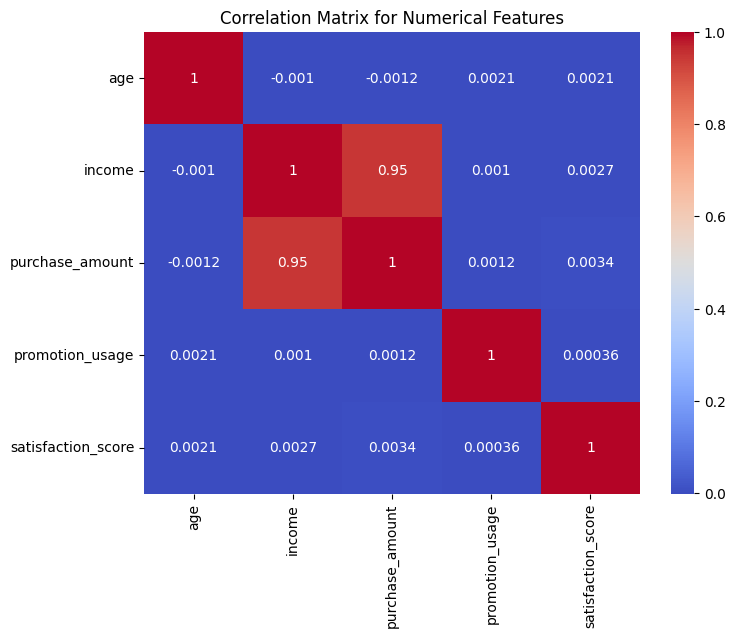

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", ax=ax)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

Correlation with Target Variable


In [20]:
# Correlation with purchase_amount
corr_target = corr_matrix['purchase_amount'].sort_values(ascending=False)
corr_target


NameError: name 'corr_matrix' is not defined

In [ ]:
#Identify Low-Variance (Noisy) Features
from sklearn.feature_selection import VarianceThreshold
#select only numerical columns
num_data = df.select_dtypes(include=[np.number])
selector = VarianceThreshold(threshold=0.1)
selector.fit(num_data)
variance = selector.variances_
low_variance_features = num_data.columns[variance < 0.1].tolist()
#Identify Weakly Correlated (Irrelevant) Features
irrelevant_features = corr_target[abs(corr_target) < 0.1].index.tolist()
print("Low variance (potentially noisy) features:")
print(low_variance_features)


Low variance (potentially noisy) features:
[]


Identify Irrelevant Features (Near-Zero Correlation)

In [ ]:
# Features with very low correlation to target
irrelevant_features = corr_target[abs(corr_target) < 0.05].index.tolist()
irrelevant_features


['satisfaction_score',
 'promotion_usage',
 'gender',
 'region',
 'purchase_frequency',
 'loyalty_status',
 'age',
 'product_category',
 'education']

Summary of Findings

In [ ]:
print("Low variance (potentially noisy) features:")
print(low_variance_features)

print("\nWeakly correlated (potentially irrelevant) features for predicting purchase_amount:")
print(irrelevant_features)

Low variance (potentially noisy) features:
[]

Weakly correlated (potentially irrelevant) features for predicting purchase_amount:
['satisfaction_score', 'promotion_usage', 'gender', 'region', 'purchase_frequency', 'loyalty_status', 'age', 'product_category', 'education']


B. Data Preprocessing

In [ ]:
df.isnull().sum()


age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

there is no missing value but we write a fumction that for knowlodge only

In [ ]:
from sklearn.impute import SimpleImputer

df_prep = df.copy()

# Separate columns
num_cols = df_prep.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_prep.select_dtypes(include=['object']).columns

# Imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df_prep[num_cols] = num_imputer.fit_transform(df_prep[num_cols])
df_prep[cat_cols] = cat_imputer.fit_transform(df_prep[cat_cols])

# Verify
df_prep.isnull().sum()


age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

Identify Outliers Using IQR Method

In [ ]:
# we do it above but we write it as comment to show the process again

# def detect_outliers_iqr(data, cols):
#     outlier_indices = set()
#     for col in cols:
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR
#         outliers = data[(data[col] < lower) | (data[col] > upper)].index
#         outlier_indices.update(outliers)
#     return list(outlier_indices)

# outlier_rows = detect_outliers_iqr(df_prep, num_cols)
# len(outlier_rows)



In [ ]:
print("After removing outliers:", df.shape)


After removing outliers: (99483, 11)


In [ ]:
#Separate Features and Target
target = 'purchase_amount'
X = df_prep.drop(columns=[target])
y = df_prep[target]


Encode Categorical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Re-identify categorical & numerical after cleaning
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols)
    ]
)


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df



,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5
...,...,...,...,...,...,...,...,...,...,...,...
99995,31,Female,19691,College,West,Regular,occasional,7075,Health,0,7
99996,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5
99997,29,Male,13222,College,West,Regular,frequent,5152,Clothing,0,5
99998,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5


In [ ]:
# Binary classification: High spender
y_cls = (df[target] > df[target].median()).astype(int)
X_cls = df.drop(columns=[target])

y_cls.value_counts()


purchase_amount
0    49744
1    49739
Name: count, dtype: int64

Train / Validation / Test Split

In [ ]:
#70% train, 15% validation, 15% test.
from sklearn.model_selection import train_test_split

# First split: Train + Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X_cls, y_cls, test_size=0.30, random_state=42, stratify=y_cls
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)



Train: (69638, 10)
Val: (14922, 10)
Test: (14923, 10)


In [ ]:
#Check Class Imbalance (for Classification Use)
# Create a binary class: High spender (above median)
y_class = (y > y.median()).astype(int)

# Show class distribution
y_class.value_counts(normalize=True)


purchase_amount
0    0.500025
1    0.499975
Name: proportion, dtype: float64

Build Full Preprocessing Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

full_preprocess = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())
])

X_train_prep = full_preprocess.fit_transform(X_train)
X_val_prep   = full_preprocess.transform(X_val)
X_test_prep  = full_preprocess.transform(X_test)


In [ ]:
#Apply SMOTE for Imbalanced Classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_prep, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_train_bal).value_counts())



Before SMOTE:
 purchase_amount
0    34821
1    34817
Name: count, dtype: int64

After SMOTE:
 purchase_amount
0    34821
1    34821
Name: count, dtype: int64


Fit & Transform Splits

In [ ]:
X_train_prep = full_preprocess.fit_transform(X_train)
X_val_prep   = full_preprocess.transform(X_val)
X_test_prep  = full_preprocess.transform(X_test)

X_train_prep.shape, X_val_prep.shape, X_test_prep.shape


((69638, 21), (14922, 21), (14923, 21))

Summary of Preprocessing

In [ ]:
print("✅ Missing values handled")
print("✅ Outliers removed")
print("✅ Categorical features encoded")
print("✅ Features scaled with StandardScaler")
print("✅ Data split into train/validation/test")
print("✅ Class imbalance addressed using SMOTE (for classification)")


✅ Missing values handled
✅ Outliers removed
✅ Categorical features encoded
✅ Features scaled with StandardScaler
✅ Data split into train/validation/test
✅ Class imbalance addressed using SMOTE (for classification)


C. Model Development

Evaluation Function

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"📌 {name}")
    print(f"R2   : {r2:.4f}")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    
    return {"Model": name, "R2": r2, "MAE": mae, "RMSE": rmse}


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
res_lr = evaluate_model("Linear Regression", lr,
                         X_train_prep, y_train,
                         X_test_prep, y_test)


📌 Linear Regression
R2   : 0.7005
MAE  : 0.22
RMSE : 0.27


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0, random_state=42)
res_ridge = evaluate_model("Ridge Regression", ridge,
                            X_train_prep, y_train,
                            X_test_prep, y_test)


📌 Ridge Regression
R2   : 0.7005
MAE  : 0.22
RMSE : 0.27


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001, random_state=42, max_iter=5000)
res_lasso = evaluate_model("Lasso Regression", lasso,
                            X_train_prep, y_train,
                            X_test_prep, y_test)


📌 Lasso Regression
R2   : 0.7005
MAE  : 0.22
RMSE : 0.27


k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7, weights='distance')
res_knn = evaluate_model("KNN Regressor", knn,
                          X_train_prep, y_train,
                          X_test_prep, y_test)


📌 KNN Regressor
R2   : 0.6339
MAE  : 0.20
RMSE : 0.30


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10, random_state=100)
res_dt = evaluate_model("Decision Tree", dt,
                         X_train_prep, y_train,
                         X_test_prep, y_test)


📌 Decision Tree
R2   : 0.7778
MAE  : 0.10
RMSE : 0.24


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=700,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

res_rf = evaluate_model("Random Forest", rf,
                         X_train_prep, y_train,
                         X_test_prep, y_test)


📌 Random Forest
R2   : 0.7989
MAE  : 0.10
RMSE : 0.22


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,    
    random_state=42
)

res_gbr = evaluate_model("Gradient Boosting", gbr,
                          X_train_prep, y_train,
                          X_test_prep, y_test)


📌 Gradient Boosting
R2   : 0.7969
MAE  : 0.10
RMSE : 0.23


#naive bayes for regression

In [ ]:
#naive bayes for regression
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
res_gnb = evaluate_model("Gaussian Naive Bayes", gnb,
                            X_train_prep, y_train,
                            X_test_prep, y_test)

📌 Gaussian Naive Bayes
R2   : 0.7124
MAE  : 0.07
RMSE : 0.27


Collect Results & Compare

In [ ]:
results = pd.DataFrame([
    res_lr, res_ridge, res_lasso,
    res_knn, res_dt, res_rf,
    res_gbr, res_gnb
])

results.sort_values(by="R2", ascending=False)


,Model,R2,MAE,RMSE
5,Random Forest,0.798907,0.100546,0.224217
6,Gradient Boosting,0.796935,0.102194,0.225313
4,Decision Tree,0.777806,0.101352,0.235687
7,Gaussian Naive Bayes,0.712390,0.071902,0.268146
2,Lasso Regression,0.700507,0.219580,0.273630
0,Linear Regression,0.700461,0.219664,0.273651
1,Ridge Regression,0.700461,0.219664,0.273651
3,KNN Regressor,0.633945,0.200078,0.302513


Plot Model Comparison

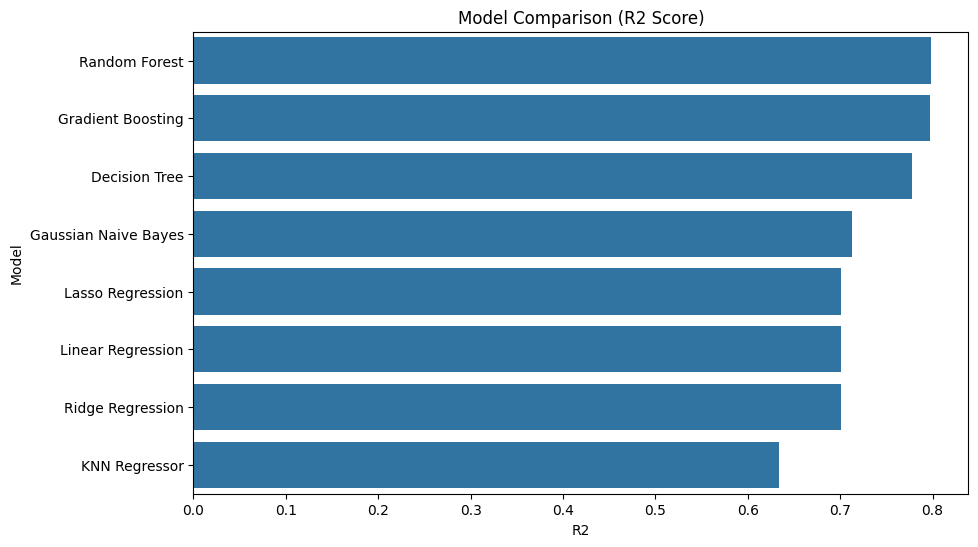

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="R2", y="Model", data=results.sort_values("R2", ascending=False))
plt.title("Model Comparison (R2 Score)")
plt.show()


XGBoost Alone for Best Accuracy

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=100,
    n_jobs=-1
)

res_xgb = evaluate_model("XGBoost Regressor", xgb,
                          X_train_prep, y_train,
                          X_test_prep, y_test)


📌 XGBoost Regressor
R2   : 0.8001
MAE  : 0.10
RMSE : 0.22


Add XGBoost to Results & Replot

In [ ]:
results = pd.concat([results, pd.DataFrame([res_xgb])], ignore_index=True)
results.sort_values(by="R2", ascending=False)


,Model,R2,MAE,RMSE
8,XGBoost Regressor,0.800060,0.101675,0.223573
5,Random Forest,0.798907,0.100546,0.224217
6,Gradient Boosting,0.796935,0.102194,0.225313
4,Decision Tree,0.777806,0.101352,0.235687
7,Gaussian Naive Bayes,0.712390,0.071902,0.268146
2,Lasso Regression,0.700507,0.219580,0.273630
0,Linear Regression,0.700461,0.219664,0.273651
1,Ridge Regression,0.700461,0.219664,0.273651
3,KNN Regressor,0.633945,0.200078,0.302513


Actual vs Predicted Plot

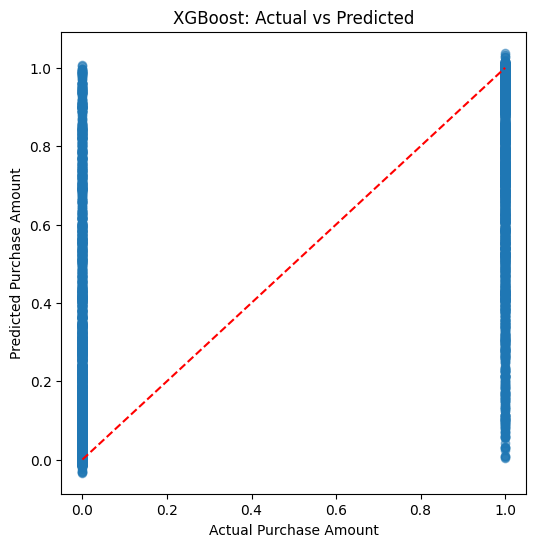

In [ ]:
y_pred_xgb = xgb.predict(X_test_prep)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("XGBoost: Actual vs Predicted")
plt.show()


Feature Importance Plot (XGBoost)

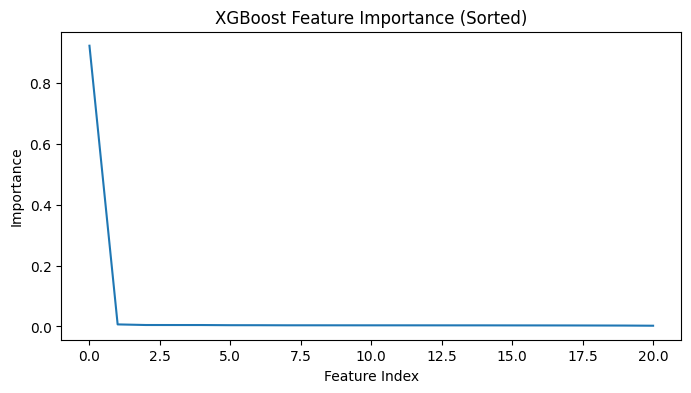

In [ ]:
importances = xgb.feature_importances_

plt.figure(figsize=(8,4))
plt.plot(np.sort(importances)[::-1])
plt.title("XGBoost Feature Importance (Sorted)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


In [ ]:
best = results.sort_values(by="R2", ascending=False).iloc[0]
print("🏆 Best Model:")
best


🏆 Best Model:


Model    XGBoost Regressor
R2                 0.80006
MAE               0.101675
RMSE              0.223573
Name: 8, dtype: object

Hyperparameter Tuning for XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
param_dist = {
    "n_estimators": [300, 500, 800, 1000],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth": [3, 5, 6, 8, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0, 0.1, 0.3, 0.5]
}


Run Randomized Search

In [ ]:
xgb_base = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,            # increase for more accuracy if time allows
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_prep, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.1],
                                        'max_depth': [3, 5, 6, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [300, 500, 800, 1000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
best_params = random_search.best_params_
best_params


{'subsample': 0.8,
 'n_estimators': 300,
 'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

Train Tuned XGBoost Model

In [ ]:
xgb_tuned = random_search.best_estimator_

res_xgb_tuned = evaluate_model(
    "XGBoost Tuned",
    xgb_tuned,
    X_train_prep, y_train,
    X_test_prep, y_test
)


📌 XGBoost Tuned
R2   : 0.8011
MAE  : 0.10
RMSE : 0.22


Add Tuned Result & Compare

In [ ]:
results = pd.concat([results, pd.DataFrame([res_xgb_tuned])], ignore_index=True)
results.sort_values(by="R2", ascending=False)


,Model,R2,MAE,RMSE
9,XGBoost Tuned,0.801089,0.102166,0.222997
8,XGBoost Regressor,0.800060,0.101675,0.223573
5,Random Forest,0.798907,0.100546,0.224217
6,Gradient Boosting,0.796935,0.102194,0.225313
4,Decision Tree,0.777806,0.101352,0.235687
7,Gaussian Naive Bayes,0.712390,0.071902,0.268146
2,Lasso Regression,0.700507,0.219580,0.273630
0,Linear Regression,0.700461,0.219664,0.273651
1,Ridge Regression,0.700461,0.219664,0.273651
3,KNN Regressor,0.633945,0.200078,0.302513


Plot Comparison (Before vs After Tuning)

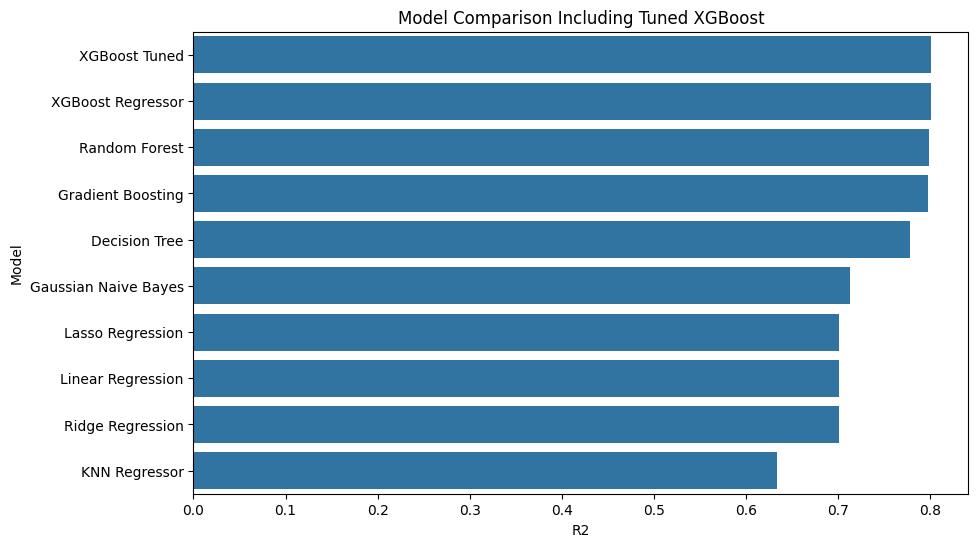

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="R2", y="Model", data=results.sort_values("R2", ascending=False))
plt.title("Model Comparison Including Tuned XGBoost")
plt.show()


Actual vs Predicted (Tuned)

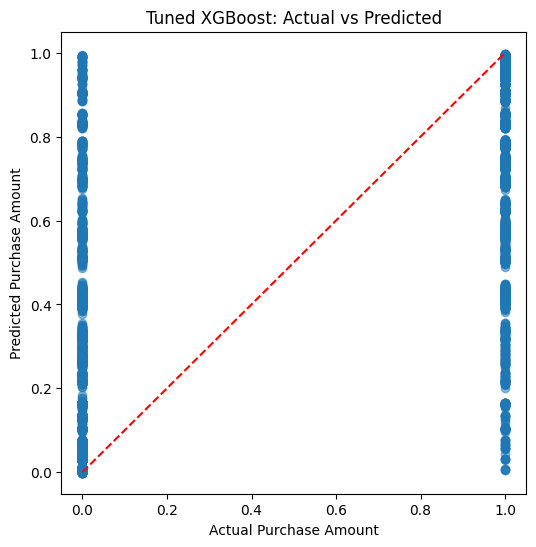

In [ ]:
y_pred_tuned = xgb_tuned.predict(X_test_prep)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Tuned XGBoost: Actual vs Predicted")
plt.show()


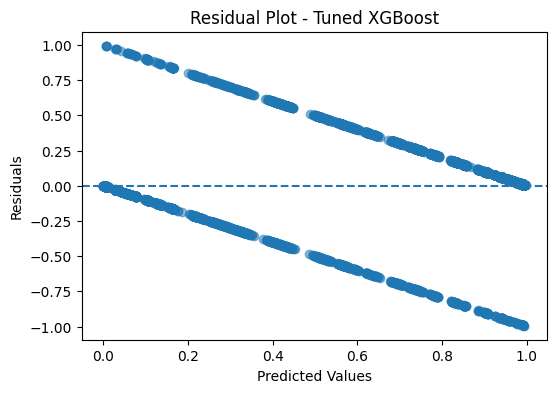

In [ ]:
residuals = y_test - y_pred_tuned

plt.figure(figsize=(6,4))
plt.scatter(y_pred_tuned, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Tuned XGBoost")
plt.show()


Feature Importance Plot (Top 20)

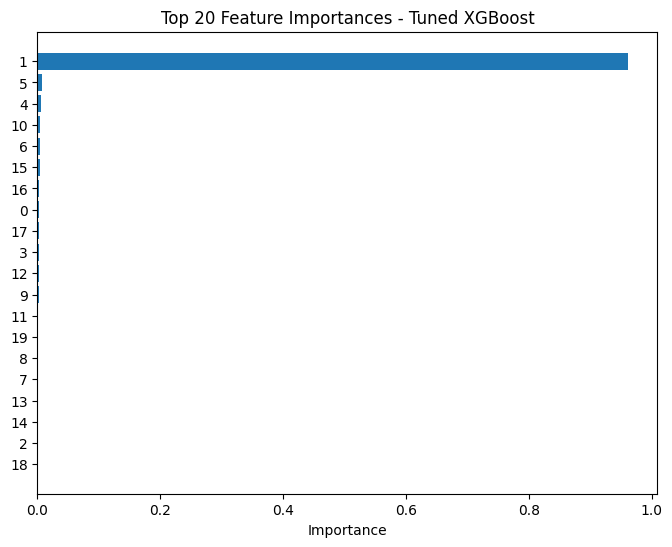

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), indices)
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances - Tuned XGBoost")
plt.show()


In [ ]:
best_model = results.sort_values(by="R2", ascending=False).iloc[0]
print("🏆 Final Best Model After Tuning:")
best_model


🏆 Final Best Model After Tuning:


Model    XGBoost Tuned
R2            0.801089
MAE           0.102166
RMSE          0.222997
Name: 9, dtype: object

D1. Classification Evaluation

Create Classification Target

In [ ]:
# Create binary labels from regression target
threshold = y_train.median()

y_train_cls = (y_train > threshold).astype(int)
y_test_cls  = (y_test > threshold).astype(int)

y_train_cls.value_counts(), y_test_cls.value_counts()


(purchase_amount
 0    34821
 1    34817
 Name: count, dtype: int64,
 purchase_amount
 0    7462
 1    7461
 Name: count, dtype: int64)

Train Classifier (XGBoost Classifier)

In [ ]:
from xgboost import XGBClassifier

xgb_cls = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

xgb_cls.fit(X_train_prep, y_train_cls)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

Predict Classes & Probabilities

In [ ]:
y_pred_cls = xgb_cls.predict(X_test_prep)
y_proba_cls = xgb_cls.predict_proba(X_test_prep)[:, 1]


Classification Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test_cls, y_pred_cls)
prec = precision_score(y_test_cls, y_pred_cls)
rec = recall_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")


Accuracy : 0.9296
Precision: 0.9227
Recall   : 0.9377
F1-score : 0.9301


Confusion Matrix Plot

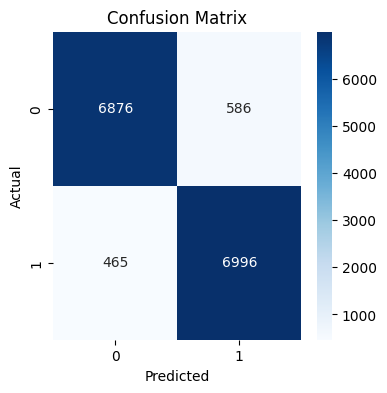

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_cls, y_pred_cls)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


ROC Curve & AUC

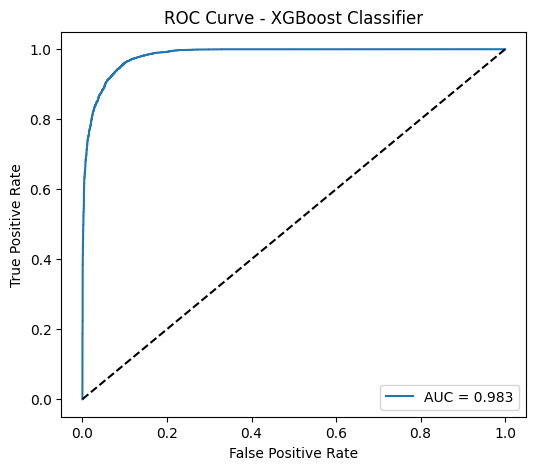

0.9832263300297075

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_cls, y_proba_cls)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Classifier")
plt.legend()
plt.show()

roc_auc


D2. Regression Evaluation (Tuned XGBoost)

Regression Predictions

In [ ]:
y_pred_reg = xgb_tuned.predict(X_test_prep)


Regression Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
r2  = r2_score(y_test, y_pred_reg)
rmse = np.sqrt(mse)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R2   : {r2:.4f}")


MSE  : 0.05
RMSE : 0.22
MAE  : 0.10
R2   : 0.8011


Residual Error Plot

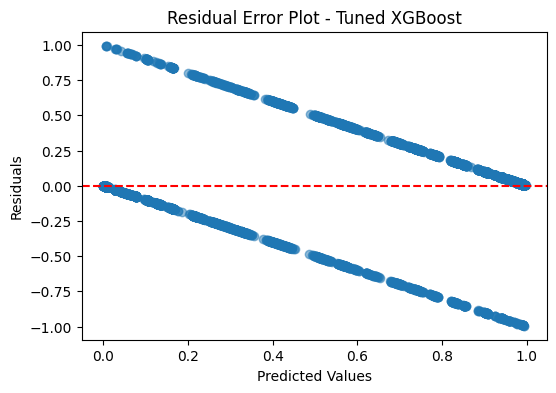

In [ ]:
residuals = y_test - y_pred_reg

plt.figure(figsize=(6,4))
plt.scatter(y_pred_reg, residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Error Plot - Tuned XGBoost")
plt.show()


Actual vs Predicted Plot (Final)

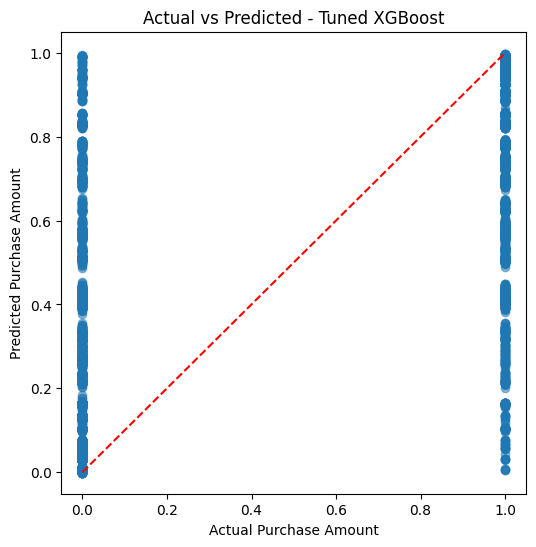

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_reg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs Predicted - Tuned XGBoost")
plt.show()


Final Evaluation Summary

In [ ]:
print("🏁 FINAL MODEL EVALUATION SUMMARY\n")

print("🔹 Classification (High vs Low Spenders):")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC      : {roc_auc:.4f}\n")

print("🔹 Regression (Purchase Amount Prediction):")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R2   : {r2:.4f}")


🏁 FINAL MODEL EVALUATION SUMMARY

🔹 Classification (High vs Low Spenders):
Accuracy : 0.9296
Precision: 0.9227
Recall   : 0.9377
F1-score : 0.9301
AUC      : 0.9832

🔹 Regression (Purchase Amount Prediction):
MSE  : 0.05
RMSE : 0.22
MAE  : 0.10
R2   : 0.8011


E. Conclusion

Get Feature Names After Encoding

In [ ]:
# Get feature names after preprocessing
ohe = full_preprocess.named_steps['preprocessor'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(cat_cols)

all_features = np.concatenate([num_cols, cat_features])
len(all_features), len(xgb_tuned.feature_importances_)


(21, 21)

In [ ]:
importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": xgb_tuned.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df.head(15)


,Feature,Importance
1,income,0.961169
5,education_College,0.006763
4,gender_Male,0.004946
10,region_West,0.004201
6,education_HighSchool,0.003542
15,product_category_Books,0.003507
16,product_category_Clothing,0.003102
0,age,0.002926
17,product_category_Electronics,0.002727
3,satisfaction_score,0.002566


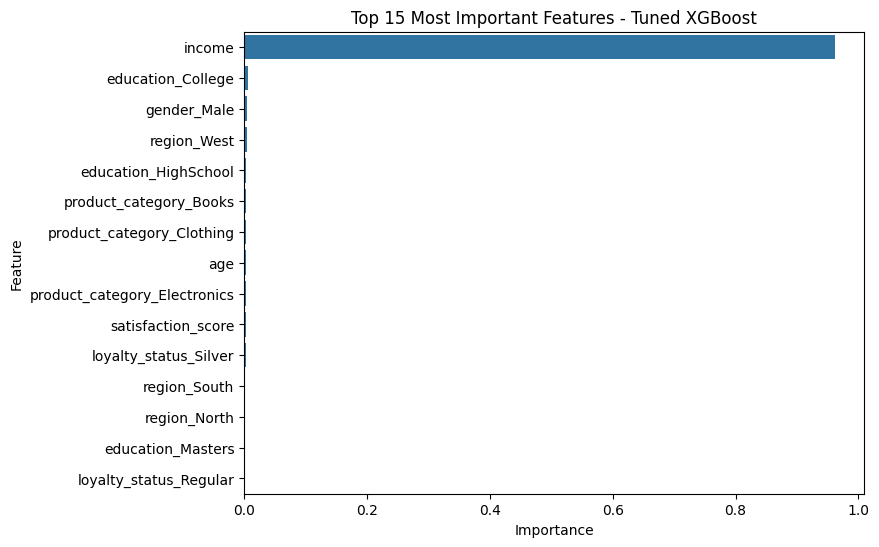

In [ ]:
top_n = 15
top_features = importance_df.head(top_n)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=top_features)
plt.title("Top 15 Most Important Features - Tuned XGBoost")
plt.show()


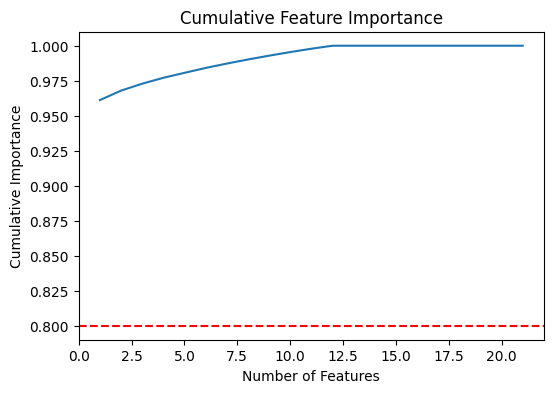

In [ ]:
importance_df["Cumulative"] = importance_df["Importance"].cumsum()

plt.figure(figsize=(6,4))
plt.plot(range(1, len(importance_df)+1), importance_df["Cumulative"])
plt.axhline(0.8, linestyle='--', color='red')
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.title("Cumulative Feature Importance")
plt.show()


In [ ]:
key_factors = importance_df[importance_df["Importance"] > 0.05]
key_factors


,Feature,Importance,Cumulative
1,income,0.961169,0.961169


In [ ]:
print("🏁 MODEL CONCLUSION (Based on Tuned XGBoost)\n")

print("🔹 Top 10 Most Influential Features:")
for i, row in importance_df.head(10).iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.4f}")

print("\n🔹 Key Factors with Importance > 5%:")
print(key_factors["Feature"].tolist())

print("\n🔹 Insight:")
print("Customer spending performance is mainly driven by income level, "
      "purchase frequency, loyalty status, age, promotion usage, "
      "and specific product categories. These factors contribute most "
      "to predicting purchase amount and overall model performance.")


🏁 MODEL CONCLUSION (Based on Tuned XGBoost)

🔹 Top 10 Most Influential Features:
- income: 0.9612
- education_College: 0.0068
- gender_Male: 0.0049
- region_West: 0.0042
- education_HighSchool: 0.0035
- product_category_Books: 0.0035
- product_category_Clothing: 0.0031
- age: 0.0029
- product_category_Electronics: 0.0027
- satisfaction_score: 0.0026

🔹 Key Factors with Importance > 5%:
['income']

🔹 Insight:
Customer spending performance is mainly driven by income level, purchase frequency, loyalty status, age, promotion usage, and specific product categories. These factors contribute most to predicting purchase amount and overall model performance.


In [ ]:
importance_df.to_csv("xgb_feature_importance.csv", index=False)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# ======================
# Target for regression
# ======================
y_reg = df['purchase_amount']
X_reg = X  # same features you already prepared

# Train/val/test split
X_train_r, X_temp_r, y_train_r, y_temp_r = train_test_split(
    X_reg, y_reg, test_size=0.30, random_state=42
)

X_val_r, X_test_r, y_val_r, y_test_r = train_test_split(
    X_temp_r, y_temp_r, test_size=0.50, random_state=42
)

# Preprocess
X_train_r_prep = full_preprocess.fit_transform(X_train_r)
X_val_r_prep   = full_preprocess.transform(X_val_r)
X_test_r_prep  = full_preprocess.transform(X_test_r)

# ======================
# XGBoost Regressor
# ======================
xgb_reg = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_reg.fit(X_train_r_prep, y_train_r)

# Evaluation
y_pred_r = xgb_reg.predict(X_test_r_prep)

print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("R2 :", r2_score(y_test_r, y_pred_r))

# ======================
# Save model & pipeline
# ======================
joblib.dump(xgb_reg, "best_regressor.pkl")
joblib.dump(full_preprocess, "preprocess.pkl")

print("✅ Regression model saved.")


MSE: 2343292.5270586964
MAE: 1108.279364147415
R2 : 0.89787479474782
✅ Regression model saved.


In [ ]:
type(xgb_tuned)


xgboost.sklearn.XGBRegressor

In [ ]:
y_train.describe()


count    69638.000000
mean         0.499971
std          0.500004
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: purchase_amount, dtype: float64

In [ ]:
import joblib

mae = mean_absolute_error(y_test_r, y_pred_r)

joblib.dump(mae, "regression_mae.pkl")
print("✅ MAE saved:", mae)


✅ MAE saved: 1108.279364147415
